In [1]:
import glob
import os
import time
from scipy.io import loadmat
import cobra
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [3]:
rpkm_df = pd.read_csv('C:/Users/NOE/Desktop/TFG-Example/Islet data/RPKM_df.txt', sep='\t')
rpkm_df

,IGT_GSM5009231_DP005,IGT_GSM5009232_DP007,IGT_GSM5009233_DP008,IGT_GSM5009237_DP013,IGT_GSM5009241_DP025,IGT_GSM5009249_DP048,IGT_GSM5009251_DP051,IGT_GSM5009258_DP059,IGT_GSM5009260_DP063,IGT_GSM5009264_DP067,...,T3cD_GSM5009324_DP152,T3cD_GSM5009326_DP160,T3cD_GSM5009328_DP162,T3cD_GSM5009331_DP167,T3cD_GSM5009332_DP169,T3cD_GSM5009333_DP170,T3cD_GSM5009335_DP174,T3cD_GSM5009336_DP176,T3cD_GSM5009339_DP180,T3cD_GSM5009354_DP208
TSPAN6,1.891658,0.685601,2.357047,1.754211,0.838088,0.488570,1.353104,1.248627,1.990745,1.025288,...,1.395488,1.979210,2.489189,2.017778,3.488634,2.364699,1.157858,2.360029,1.739847,1.555695
TNMD,0.000000,0.000000,0.003583,0.030943,0.007894,0.000000,0.000000,0.005709,0.000000,0.000000,...,0.003867,0.000000,0.007280,0.000000,0.000000,0.000000,0.014005,0.023000,0.000000,0.000000
DPM1,1.187386,1.757754,1.968083,1.519090,1.473006,1.574222,1.257316,1.896734,1.939029,1.653009,...,2.176734,2.247489,1.632006,2.050239,1.678436,1.519393,2.298589,1.902165,2.549283,2.124352
SCYL3,0.310384,0.516502,0.341949,0.519630,0.273615,0.391841,0.254250,0.529582,0.404097,0.270467,...,0.281033,0.299949,0.303955,0.321185,0.355986,0.366479,0.349429,0.334528,0.435523,0.333488
FIRRM,0.012456,0.012471,0.011990,0.019266,0.017202,0.018850,0.013041,0.017772,0.012032,0.014789,...,0.016553,0.007699,0.013410,0.006649,0.023568,0.024554,0.010082,0.006137,0.016316,0.016209
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TUSC2P1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
H2BK1,0.020988,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
LINC03094,0.155854,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.119520,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.412759,0.000000,0.000000
LOC112267968,0.000797,0.000000,0.003068,0.011355,0.000000,0.000000,0.001464,0.001222,0.000000,0.000000,...,0.000828,0.004579,0.000000,0.003540,0.000000,0.003042,0.005996,0.002814,0.000761,0.000000


In [39]:
rpkm_log2=np.log2(rpkm_df + 1)
rpkm_log2

,IGT_GSM5009231_DP005,IGT_GSM5009232_DP007,IGT_GSM5009233_DP008,IGT_GSM5009237_DP013,IGT_GSM5009241_DP025,IGT_GSM5009249_DP048,IGT_GSM5009251_DP051,IGT_GSM5009258_DP059,IGT_GSM5009260_DP063,IGT_GSM5009264_DP067,...,T3cD_GSM5009324_DP152,T3cD_GSM5009326_DP160,T3cD_GSM5009328_DP162,T3cD_GSM5009331_DP167,T3cD_GSM5009332_DP169,T3cD_GSM5009333_DP170,T3cD_GSM5009335_DP174,T3cD_GSM5009336_DP176,T3cD_GSM5009339_DP180,T3cD_GSM5009354_DP208
TSPAN6,1.531897,0.753263,1.747193,1.461639,0.878206,0.573927,1.234565,1.169045,1.580505,1.018127,...,1.260319,1.574930,1.802892,1.593487,2.166277,1.750478,1.109600,1.748474,1.454095,1.353715
TNMD,0.000000,0.000000,0.005159,0.043964,0.011343,0.000000,0.000000,0.008212,0.000000,0.000000,...,0.005568,0.000000,0.010465,0.000000,0.000000,0.000000,0.020064,0.032806,0.000000,0.000000
DPM1,1.129208,1.463494,1.569532,1.332903,1.306266,1.364136,1.174609,1.534427,1.555340,1.407629,...,1.667544,1.699324,1.396163,1.608922,1.421391,1.333076,1.721849,1.537129,1.827527,1.643557
SCYL3,0.389990,0.600748,0.424330,0.603721,0.348930,0.476994,0.326825,0.613137,0.489643,0.345359,...,0.357307,0.378455,0.382894,0.401832,0.439342,0.450463,0.432349,0.416329,0.521577,0.415205
FIRRM,0.017860,0.017880,0.017194,0.027531,0.024606,0.026942,0.018693,0.025414,0.017255,0.021180,...,0.023686,0.011065,0.019217,0.009561,0.033607,0.034997,0.014473,0.008827,0.023348,0.023197
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TUSC2P1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
H2BK1,0.029966,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
LINC03094,0.208959,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.162880,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.498516,0.000000,0.000000
LOC112267968,0.001149,0.000000,0.004419,0.016290,0.000000,0.000000,0.002111,0.001762,0.000000,0.000000,...,0.001194,0.006590,0.000000,0.005098,0.000000,0.004382,0.008625,0.004053,0.001097,0.000000


In [40]:
cv_per_gene = (rpkm_log2.std(axis=1) / rpkm_log2.mean(axis=1)) * 100
cv_per_gene


TSPAN6           25.194781
TNMD            257.319092
DPM1             14.493845
SCYL3            25.055588
FIRRM            51.437501
                   ...    
TUSC2P1                NaN
H2BK1           817.204533
LINC03094       340.139340
LOC112267968    209.447138
LOC128706666           NaN
Length: 35836, dtype: float64

In [41]:
top_500_genes = cv_per_gene.nlargest(500)
top_500_genes

ARHGEF28P1      1153.256259
LOC124906839    1153.256259
CHEK2P7         1153.256259
RPL23AP27       1153.256259
RNU6-389P       1153.256259
                   ...     
COX6CP12        1153.256259
OR2AI1P         1153.256259
RNU7-138P       1153.256259
RPLP0P11        1153.256259
RN7SL601P       1153.256259
Length: 500, dtype: float64

In [42]:
datos_top_500_genes = rpkm_log2.loc[top_500_genes.index]
datos_top_500_genes

,IGT_GSM5009231_DP005,IGT_GSM5009232_DP007,IGT_GSM5009233_DP008,IGT_GSM5009237_DP013,IGT_GSM5009241_DP025,IGT_GSM5009249_DP048,IGT_GSM5009251_DP051,IGT_GSM5009258_DP059,IGT_GSM5009260_DP063,IGT_GSM5009264_DP067,...,T3cD_GSM5009324_DP152,T3cD_GSM5009326_DP160,T3cD_GSM5009328_DP162,T3cD_GSM5009331_DP167,T3cD_GSM5009332_DP169,T3cD_GSM5009333_DP170,T3cD_GSM5009335_DP174,T3cD_GSM5009336_DP176,T3cD_GSM5009339_DP180,T3cD_GSM5009354_DP208
ARHGEF28P1,0.000000,0.000000,0.0,0.0,0.0,0.0,1.460846,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
LOC124906839,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
CHEK2P7,0.011907,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
RPL23AP27,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
RNU6-389P,0.000000,0.782187,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
COX6CP12,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
OR2AI1P,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
RNU7-138P,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
RPLP0P11,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [43]:
import pandas as pd

ta= datos_top_500_genes.T
ta
ta['conditions'] = ta.index.map(lambda x: 'ND' if 'ND' in x else 'IGT' if 'IGT' in x else 'T2D' if 'T2D' in x else 'T3cD')
# Establecer 'conditions' como índice
ta.set_index('conditions', inplace=True)
ta.index.name = None

# Añadir la columna "patologia" basada en el índice
ta['patologia'] = ta.index.map(lambda x: 'ND' if 'ND' in x else 'IGT' if 'IGT' in x else 'T2D' if 'T2D' in x else 'T3cD')

# Mover el índice a una nueva columna
ta.reset_index(inplace=True)

# Cambiar el nombre de la nueva columna a 'patologia' y eliminar la columna anterior
ta = ta.rename(columns={'index': 'patologia'}).iloc[:, :-1]

ta

,patologia,ARHGEF28P1,LOC124906839,CHEK2P7,RPL23AP27,RNU6-389P,MIR422A,LOC100420228,PAWRP2,RNU5A-2P,...,RN7SKP199,RN7SKP111,RPL37P10,OR6C5P,MTATP6P23,COX6CP12,OR2AI1P,RNU7-138P,RPLP0P11,RN7SL601P
0,IGT,0.0,0.0,0.011907,0.0,0.000000,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,IGT,0.0,0.0,0.000000,0.0,0.782187,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,IGT,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,IGT,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.272382,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,IGT,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
128,T3cD,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
129,T3cD,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
130,T3cD,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
131,T3cD,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


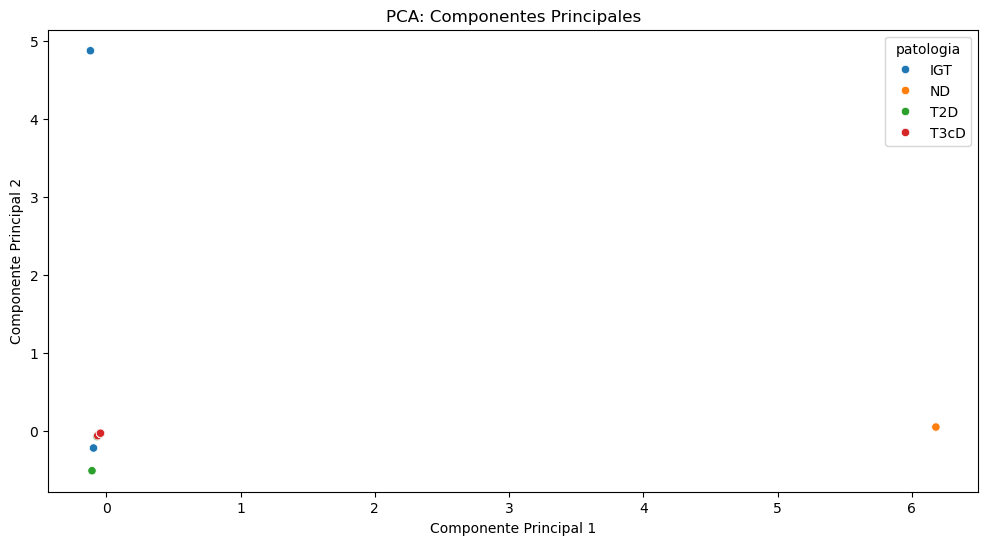

In [44]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

x = ta.iloc[:, 1:35002].values  
y = ta.loc[:, ["patologia"]].values

pca = PCA(n_components=2)
components = pca.fit_transform(x)

# Crear DataFrame para los componentes principales
pca_df = pd.DataFrame(data=components, columns=['PC1', 'PC2'])

# Concatenar con la columna y
pcaDF = pd.concat([pca_df, pd.DataFrame(y, columns=["patologia"])], axis=1)


# Graficar los resultados
plt.figure(figsize=(12, 6))
scatter=sns.scatterplot(data=pcaDF, x='PC1', y='PC2', hue="patologia")



plt.title('PCA: Componentes Principales')
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.show()